## Import Dataset

In [2]:
from teaspoon.ML import load_datasets
import numpy as np
import pandas as pd
mnist = load_datasets.mnist()
mnist

,zero_dim_rtl,zero_dim_ltr,zero_dim_btt,zero_dim_ttb,one_dim_rtl,one_dim_ltr,one_dim_btt,one_dim_ttb,labels
0,"[[23.0, 50.0], [13.0, 20.0]]","[[24.0, 50.0], [11.0, 21.0]]","[[24.0, 50.0], [8.0, 9.0]]","[[23.0, 50.0]]",[],[],[],[],5
1,"[[22.0, 50.0]]","[[22.0, 50.0]]","[[23.0, 50.0]]","[[24.0, 50.0]]","[[0.0, 8.0]]","[[0.0, 8.0]]","[[0.0, 9.0]]","[[0.0, 8.0]]",0
2,"[[22.0, 50.0]]","[[25.0, 50.0]]","[[24.0, 50.0], [15.0, 16.0]]","[[23.0, 50.0], [13.0, 22.0]]",[],[],[],[],4
3,"[[21.0, 50.0]]","[[20.0, 50.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]",[],[],[],[],1
4,"[[20.0, 50.0], [16.0, 18.0]]","[[22.0, 50.0], [14.0, 15.0]]","[[26.0, 50.0]]","[[21.0, 50.0]]","[[0.0, 9.0]]","[[0.0, 12.0]]","[[0.0, 9.0]]","[[0.0, 14.0]]",9
...,...,...,...,...,...,...,...,...,...
59995,"[[23.0, 50.0], [16.0, 17.0]]","[[22.0, 50.0], [16.0, 18.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]","[[0.0, 13.0], [0.0, 7.0]]","[[0.0, 13.0], [0.0, 9.0]]","[[0.0, 16.0], [0.0, 6.0]]","[[0.0, 17.0], [0.0, 5.0]]",8
59996,"[[21.0, 50.0], [17.0, 18.0]]","[[24.0, 50.0], [12.0, 18.0], [9.0, 17.0]]","[[23.0, 50.0]]","[[24.0, 50.0], [7.0, 10.0]]",[],[],[],[],3
59997,"[[24.0, 50.0], [13.0, 18.0]]","[[23.0, 50.0], [12.0, 20.0]]","[[24.0, 50.0]]","[[23.0, 50.0], [5.0, 7.0]]",[],[],[],[],5
59998,"[[23.0, 50.0], [8.0, 21.0]]","[[22.0, 50.0], [11.0, 15.0]]","[[21.0, 50.0]]","[[26.0, 50.0], [8.0, 15.0]]","[[0.0, 17.0]]","[[0.0, 8.0]]","[[0.0, 15.0]]","[[0.0, 10.0]]",6


### Fill Missing Data in One Dimension

In [2]:
def fill_missing(dim_1):
    for i in range(0, len(dim_1)):
        if len(dim_1[i])== 0:
            dim_1[i] = np.array([[0,.01]])
        else: 
            dim_1[i] = dim_1[i]
    return dim_1

In [3]:
import warnings
warnings.filterwarnings('ignore')
mnist['one_dim_rtl'] = fill_missing(mnist['one_dim_rtl'])
mnist['one_dim_ltr'] = fill_missing(mnist['one_dim_ltr'])
mnist['one_dim_btt'] = fill_missing(mnist['one_dim_btt'])
mnist['one_dim_ttb'] = fill_missing(mnist['one_dim_ttb'])

### Choose Dimension for Timing Test

In [3]:
def train_test_split_sklearn(DgmsFD, labels_col, train_size=.5, seed=12):
    from sklearn.model_selection import train_test_split
    labels = DgmsFD[labels_col]
    training_dgms, testing_dgms = train_test_split(DgmsFD, train_size=train_size, random_state=seed, stratify=labels)
    return training_dgms.reset_index(), testing_dgms.reset_index()

In [4]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = .05)
xdgm0_train = dgms_train['zero_dim_rtl']
xdgm0_test = dgms_test['zero_dim_rtl']
xdgm1_train = dgms_train['one_dim_rtl']
xdgm1_test = dgms_test['one_dim_rtl']
labels_train = dgms_train['labels']
labels_test = dgms_test['labels']

### Load original persistence images method function from teaspoon

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersistenceImager
import math
from math import pi
from numpy.linalg import norm as lnorm
from sympy.abc import t
from sympy import Piecewise
from sympy import diff, integrate
from itertools import combinations

def F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=True):
    

    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    if training == True:
        # adjust the image parameters and compute images
        pers_imager = PersistenceImager()
        pers_imager.pixel_size = PS
        pers_imager.kernel_params = {'sigma': var}

        PDs = PD1.tolist()
        pers_imager.fit(PDs, skew=True)
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]
    else:
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output

In [234]:
from numba import jit
@jit(nopython=True, parallel=True)
def pers_reshape_par(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k]
    return result 

In [235]:
from numba import jit
@jit(nopython=True)
def pers_reshape(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k]
    return result 

In [227]:
from numba import vectorize
@vectorize
def pers_reshape_vec(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    result = np.zeros((r, n*m))
    for i in range(0,r):
        for j in range(0,n):
            for k in range(0,m):
                result[i, k+m*j] = dgms[i][j][k] 

In [228]:

def pers_reshape(dgms):
    n = dgms[1].shape[0]
    m = dgms[1].shape[1]
    r = len(dgms)
    return np.reshape(dgms, (r, n+m))

In [238]:
import time
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pers_imager = PersistenceImager()
pers_imager.pixel_size = .1
pers_imager.kernel_params = {'sigma': 1}
seed = [0,1,2,3,4]
train_size = [.001, .005, .01, .05, .1, .15]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        print("Seed is: ", j)
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)
        print("Done with sampling")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train, n_jobs=cpu_count))
        X_train_features = pers_reshape_par(X_train_features)
        end = time.time()-start
        timing[i,1] +=end
        print("Done with parallel")

        start = time.time()
        pers_imager.fit(xdgm0_train)
        X_train_features = np.array(pers_imager.transform(xdgm0_train))
        X_train_features = pers_reshape(X_train_features)
        end = time.time()-start
        timing[i,2] +=end
        print("Done with serial")

        start = time.time()
        output = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
        end = time.time()-start
        timing[i,3] +=end
        print("Done with original")

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'Parallel (8 cores)', 'Single Core', 'Prior Function']
print(timing)

Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  2
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  3
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  4
Done with sampling
Done with parallel
Done with serial
Done with original
Finished Training  0
Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  2
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  3
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  4
Done with sampling
Done with parallel
Done with serial
Done with original
Finished Training  1
Seed is:  0
Done with sampling
Done with parallel
Done with serial
Done with original
Seed is:  1


Text(0, 0.5, 'Time in Seconds')

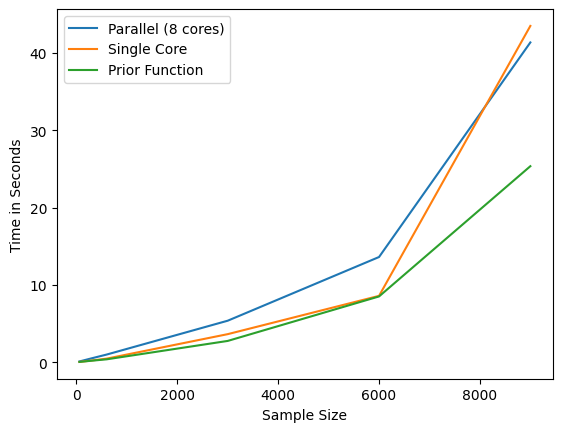

In [239]:
t = timing.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")

In [210]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 10)
xdgm0_train = dgms_train['zero_dim_rtl']
output0 = F_Image(xdgm0_train, PS=8, var=1, plot=False, training=True)
output0['F_Matrix'].shape

(10, 8)

In [211]:
from persim import PersistenceImager
pers_imager = PersistenceImager()
pers_imager.fit(xdgm0_train)
pers_imager.pixel_size = 8
pers_imager.kernel_params = {'sigma': 1}
outputn = np.array(pers_imager.transform(xdgm0_train))
output1 = pers_reshape(outputn)

In [212]:
output1

array([[3.17263306e-126, 1.45780267e-056, 1.41951503e-014,
        1.14091306e+001, 1.41566094e-126, 6.50486284e-057,
        6.33401955e-015, 5.09086939e+000],
       [1.54268769e-001, 2.31524140e-016, 2.13661903e-007,
        6.74581597e-003, 3.45731231e-001, 4.99600361e-016,
        9.18249231e-004, 2.89913187e+001],
       [4.99436167e-079, 3.90683722e-030, 1.16644064e-008,
        5.01053780e-007, 2.61372439e-071, 2.04458476e-022,
        6.10439242e-001, 2.62218993e+001],
       [4.99436167e-079, 3.90683722e-030, 1.16644064e-008,
        5.01053780e-007, 2.61372439e-071, 2.04458476e-022,
        6.10439242e-001, 2.62218993e+001],
       [1.51235268e+000, 1.77052251e-012, 3.99017997e-013,
        3.99017997e-013, 6.51163927e-001, 1.16169267e-014,
        8.64328077e+000, 8.64328077e+000],
       [5.19172874e-001, 7.89831619e-013, 2.13661903e-007,
        6.74581597e-003, 1.16351662e+000, 1.77002857e-012,
        9.18249231e-004, 2.89913187e+001],
       [1.85766182e-091, 1.1984580

In [201]:
np.array(outputn).shape

(10, 2, 4)

In [204]:
result

array([[3.17263306e-126, 1.45780267e-056, 1.41951503e-014,
        1.14091306e+001, 1.41566094e-126, 6.50486284e-057,
        6.33401955e-015, 5.09086939e+000],
       [1.54268769e-001, 2.31524140e-016, 2.13661903e-007,
        6.74581597e-003, 3.45731231e-001, 4.99600361e-016,
        9.18249231e-004, 2.89913187e+001],
       [4.99436167e-079, 3.90683722e-030, 1.16644064e-008,
        5.01053780e-007, 2.61372439e-071, 2.04458476e-022,
        6.10439242e-001, 2.62218993e+001],
       [4.99436167e-079, 3.90683722e-030, 1.16644064e-008,
        5.01053780e-007, 2.61372439e-071, 2.04458476e-022,
        6.10439242e-001, 2.62218993e+001],
       [1.51235268e+000, 1.77052251e-012, 3.99017997e-013,
        3.99017997e-013, 6.51163927e-001, 1.16169267e-014,
        8.64328077e+000, 8.64328077e+000],
       [5.19172874e-001, 7.89831619e-013, 2.13661903e-007,
        6.74581597e-003, 1.16351662e+000, 1.77002857e-012,
        9.18249231e-004, 2.89913187e+001],
       [1.85766182e-091, 1.1984580

In [214]:
output0['F_Matrix'] - output1

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [213]:
output1 - result

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [60]:
output0['F_Matrix'].shape

(600, 884)

In [61]:
output1.shape

(600, 884)

In [47]:
%timeit output0 = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
%timeit output1 = jit_F_Image(xdgm0_train, PS=.1, var=1, plot = False, training=True)

17.6 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


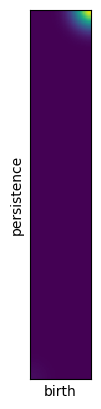

In [37]:
output1 = F_Image(xdgm0_train, PS=.1, var=1, plot=True, training=True, pers_imager=pi)

In [39]:
output0

{'figures': [<Figure size 640x480 with 1 Axes>],
 'F_Matrix': array([[9.50975080e-046, 9.41520563e-046, 9.22892583e-046, ...,
         3.54494212e-013, 2.92543767e-013, 2.44360088e-013],
        [7.77072155e-286, 1.88306132e-284, 4.51779957e-283, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [4.27383805e-046, 5.16731949e-046, 6.18547753e-046, ...,
         0.00000000e+000, 2.77555756e-015, 0.00000000e+000],
        ...,
        [2.40851608e-041, 4.34281236e-041, 7.75270381e-041, ...,
         2.27318164e-011, 1.71795911e-011, 1.28630440e-011],
        [1.73933013e-262, 2.31397184e-261, 3.04785178e-260, ...,
         3.72541997e-011, 2.08723039e-011, 1.15767396e-011],
        [1.96092280e-048, 2.89530688e-048, 4.23242581e-048, ...,
         8.05355782e-013, 4.07007761e-013, 2.04947170e-013]]),
 'pers_imager': PersistenceImager(birth_range=(0.0, 26.0), pers_range=(1.0, 33.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel